In [1]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 📥 Load Dataset
df = pd.read_csv('/content/ecommerce_customer_data.csv')


In [3]:
# 📊 Basic Info
print(df.info())
print(df.describe())
print(df.isnull().sum().sort_values(ascending=False))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   9508 non-null   object 
 1   RegistrationDate             9504 non-null   object 
 2   Age                          9485 non-null   float64
 3   Gender                       7388 non-null   object 
 4   IncomeLevel                  7497 non-null   object 
 5   Country                      9507 non-null   object 
 6   City                         9517 non-null   object 
 7   TotalPurchases               9470 non-null   float64
 8   AverageOrderValue            9481 non-null   float64
 9   CustomerLifetimeValue        9507 non-null   float64
 10  FavoriteCategory             8411 non-null   object 
 11  SecondFavoriteCategory       8450 non-null   object 
 12  EmailEngagementRate          9524 non-null   float64
 13  SocialMediaEngage

In [4]:
# 🧹 Data Cleaning
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['IncomeLevel'] = df['IncomeLevel'].fillna(df['IncomeLevel'].mode()[0])
df = df.dropna(subset=['CustomerLifetimeValue', 'AverageOrderValue'])
df['PremiumMember'] = df['PremiumMember'].map({'Yes': 1, 'No': 0})
df['RepeatCustomer'] = df['RepeatCustomer'].map({'Yes': 1, 'No': 0})



/tmp/ipython-input-4-3313409358.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PremiumMember'] = df['PremiumMember'].map({'Yes': 1, 'No': 0})
/tmp/ipython-input-4-3313409358.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RepeatCustomer'] = df['RepeatCustomer'].map({'Yes': 1, 'No': 0})


In [5]:
# 🛠️ Feature Engineering
df['TotalSpend'] = df['TotalPurchases'] * df['AverageOrderValue']



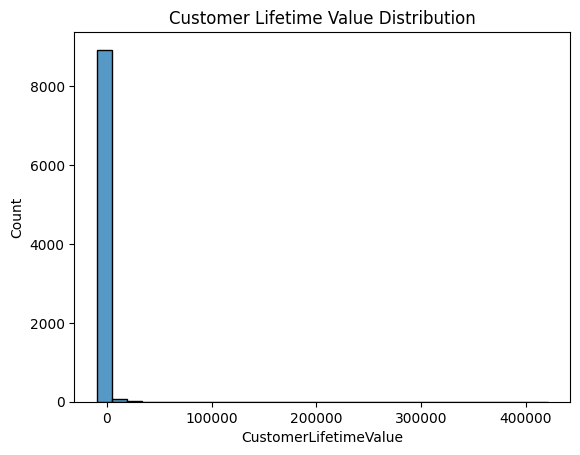

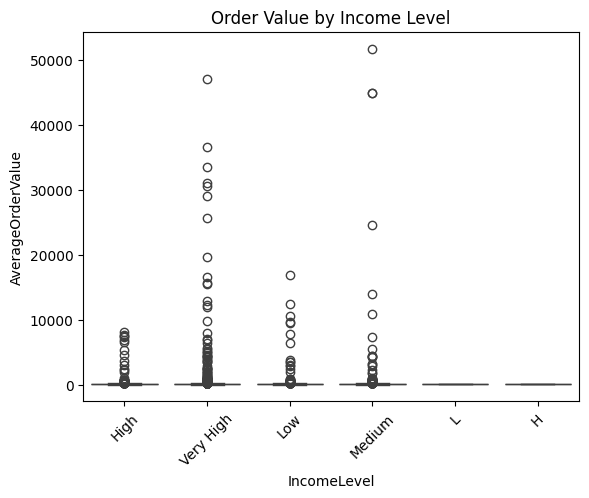

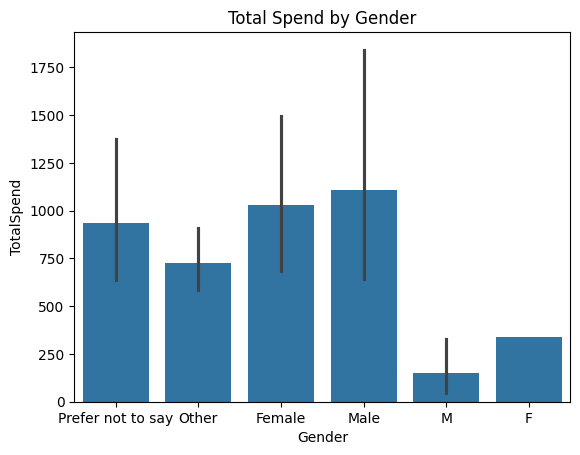

In [6]:
# 🎨 EDA Visualizations
sns.histplot(df['CustomerLifetimeValue'], bins=30)
plt.title('Customer Lifetime Value Distribution')
plt.show()

sns.boxplot(x='IncomeLevel', y='AverageOrderValue', data=df)
plt.title('Order Value by Income Level')
plt.xticks(rotation=45)
plt.show()

sns.barplot(x='Gender', y='TotalSpend', data=df)
plt.title('Total Spend by Gender')
plt.show()



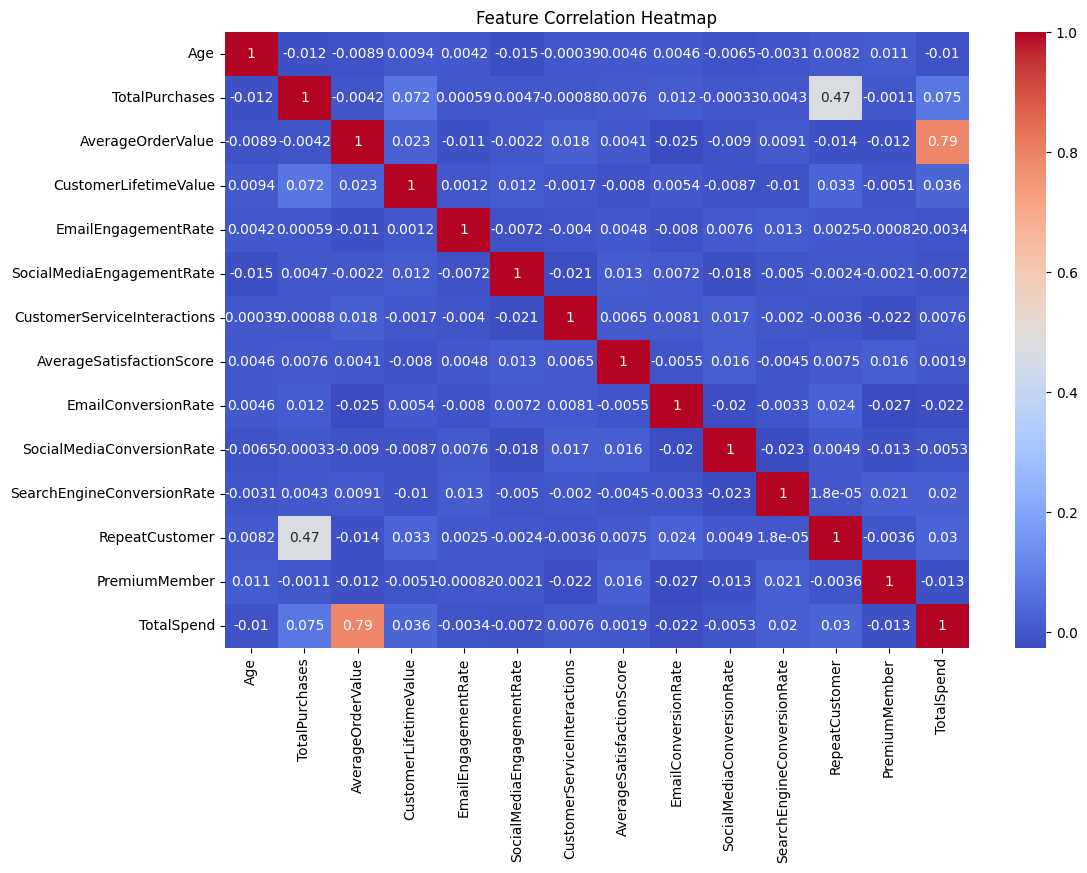

In [7]:
# 🔍 Correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [10]:
# 🤖 Baseline Model
features = ['Age', 'TotalPurchases', 'AverageOrderValue', 'CustomerLifetimeValue',
            'EmailEngagementRate', 'SocialMediaEngagementRate', 'EmailConversionRate',
            'SearchEngineConversionRate', 'RepeatCustomer']
X = df[features]
y = df['PremiumMember']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1014    0]
 [ 242    0]]
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89      1014
         1.0       0.00      0.00      0.00       242

    accuracy                           0.81      1256
   macro avg       0.40      0.50      0.45      1256
weighted avg       0.65      0.81      0.72      1256



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
